# 🚀 Week 02: Training Machine Learning Models 🎯  

This week, we dive deeper into **Machine Learning** by learning how to **train models** for different types of problems, including **classification** and **prediction** tasks. 🧠💡  

### What You’ll Learn:  
🔹 How to **train models** using real-world data.  
🔹 The role of **features** in improving predictions.  
🔹 How to **evaluate model performance** and fine-tune it.  
🔹 The impact of **hyperparameters** like learning rate and epochs.  

By the end of this week, you'll be able to build, train, and test models confidently. Get ready to experiment, analyze, and improve your models! 🚀🔥

## Exercise 01 : **Predicting Trip Fare using Linear Regression**  
---

### **Objective**  
The goal of this task is to build a machine learning model that predicts the fare price of a trip based on selected features. You will go through the full machine learning workflow, including data preprocessing, model training, evaluation, and visualization.  

### **Tasks Overview**  

Follow these steps to train and evaluate a machine learning model:  

1. **Load and Explore the Data** 📝  
2. **Prepare the Data** 🔧  
3. **Train the Model** 🎯  
4. **Make Predictions** 🔮  
5. **Evaluate the Model** 📊  

### **Resources**  
[A Visual Introduction To (Almost) Everything You Should Know](https://mlu-explain.github.io/linear-regression/)

---

### 1.Load and Explore the Data 📝

Load the dataset using pandas and inspect its structure.
Check for missing values and basic statistics.
Visualize key features to understand their relationship with the target variable.

Index(['TRIP_START_TIMESTAMP', 'TRIP_END_TIMESTAMP', 'TRIP_START_HOUR',
       'TRIP_SECONDS', 'TRIP_MILES', 'TRIP_SPEED', 'PICKUP_CENSUS_TRACT',
       'DROPOFF_CENSUS_TRACT', 'PICKUP_COMMUNITY_AREA',
       'DROPOFF_COMMUNITY_AREA', 'FARE', 'TIPS', 'TIP_RATE', 'TOLLS', 'EXTRAS',
       'TRIP_TOTAL', 'PAYMENT_TYPE', 'COMPANY'],
      dtype='object')
>> df info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31694 entries, 0 to 31693
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TRIP_START_TIMESTAMP    31694 non-null  object 
 1   TRIP_END_TIMESTAMP      31694 non-null  object 
 2   TRIP_START_HOUR         31694 non-null  float64
 3   TRIP_SECONDS            31694 non-null  int64  
 4   TRIP_MILES              31694 non-null  float64
 5   TRIP_SPEED              31694 non-null  float64
 6   PICKUP_CENSUS_TRACT     13259 non-null  float64
 7   DROPOFF_CENSUS_TRACT    14023 non-null  floa

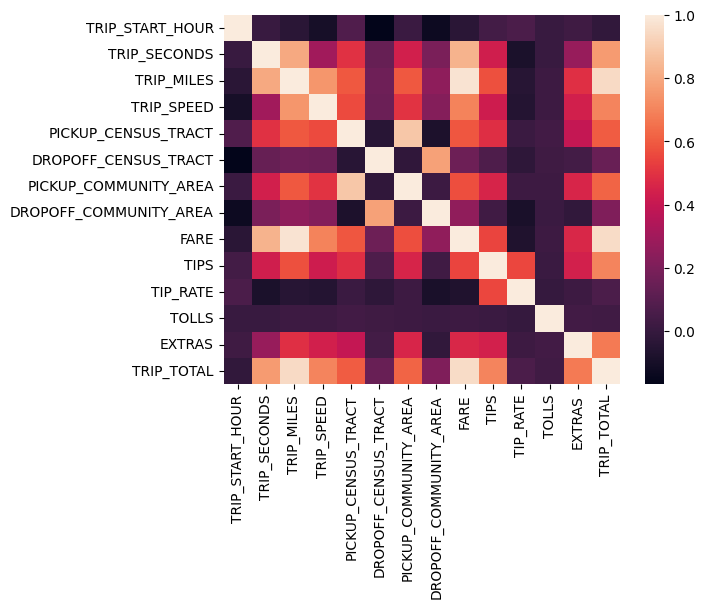

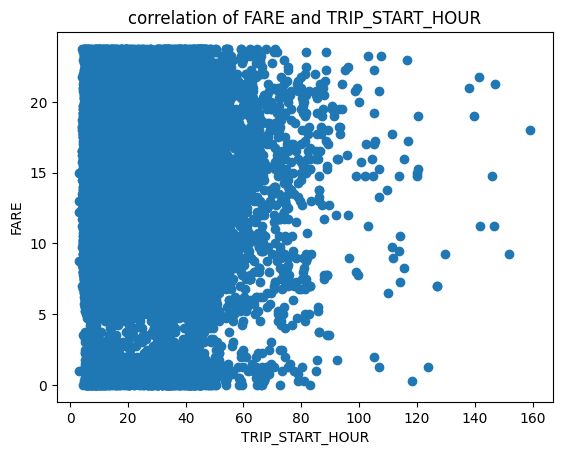

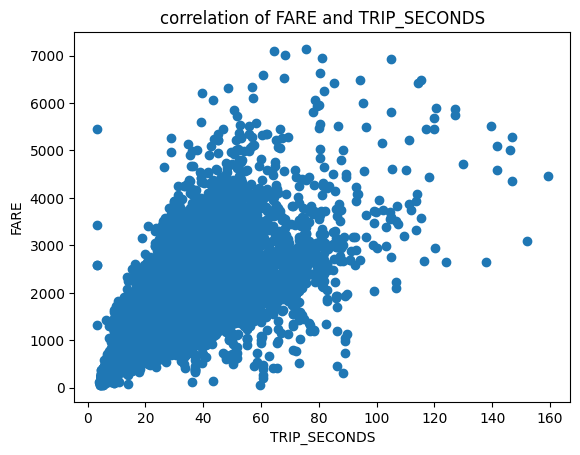

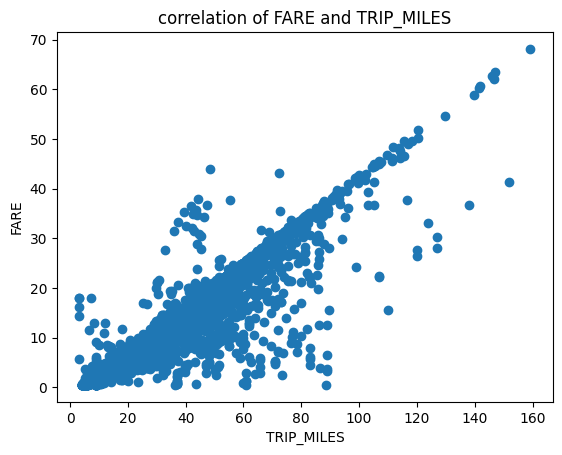

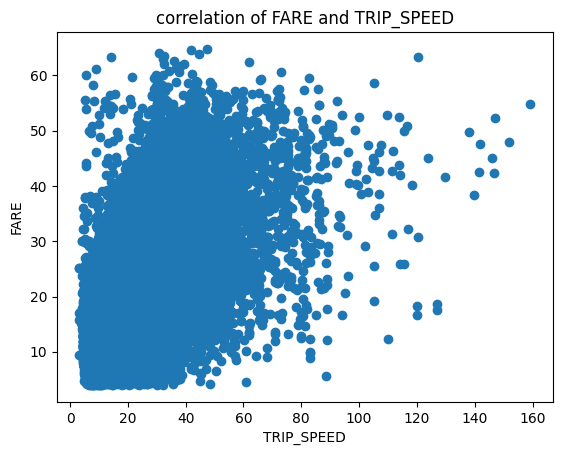

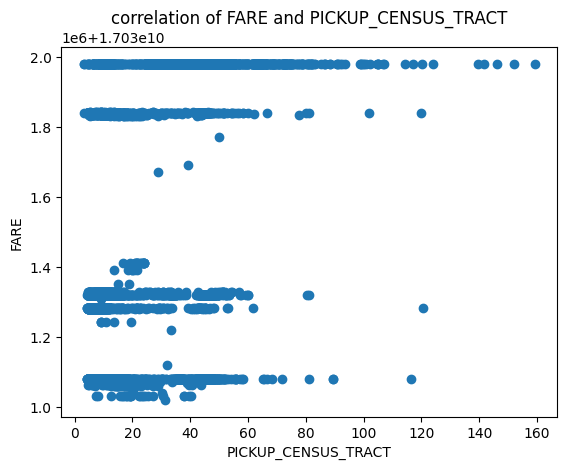

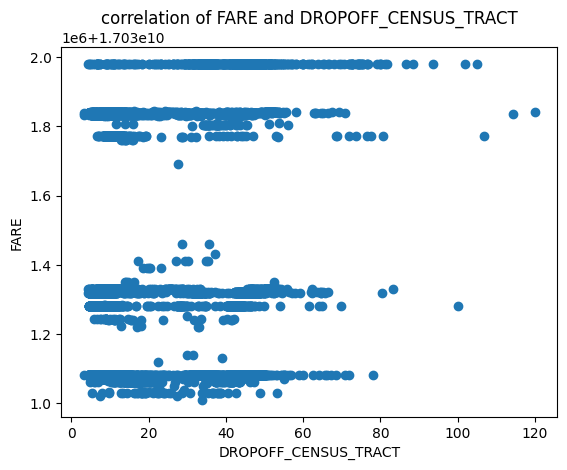

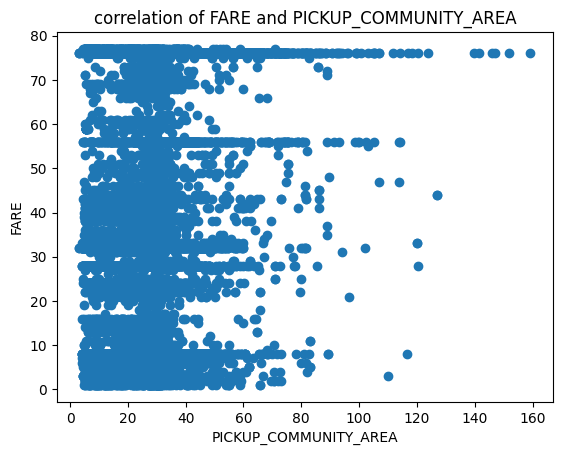

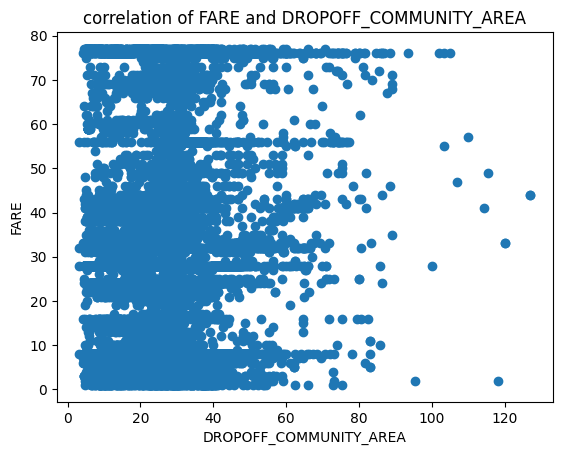

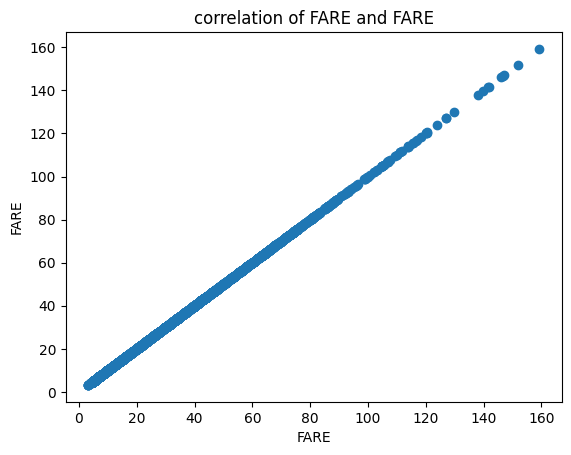

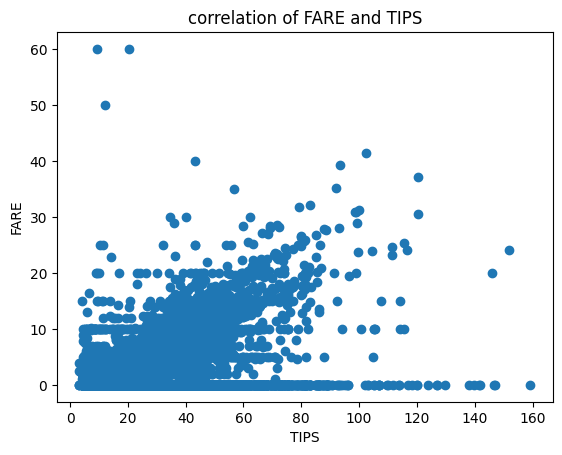

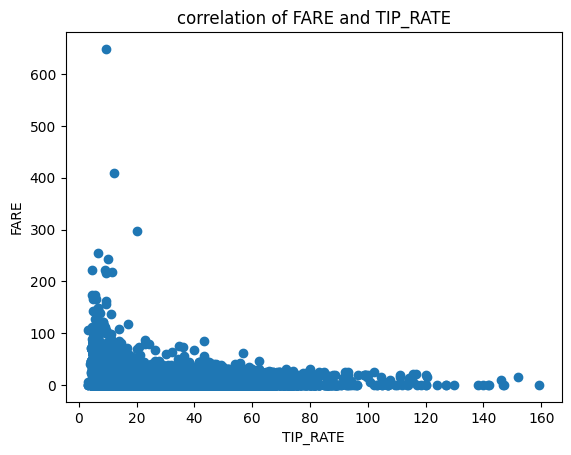

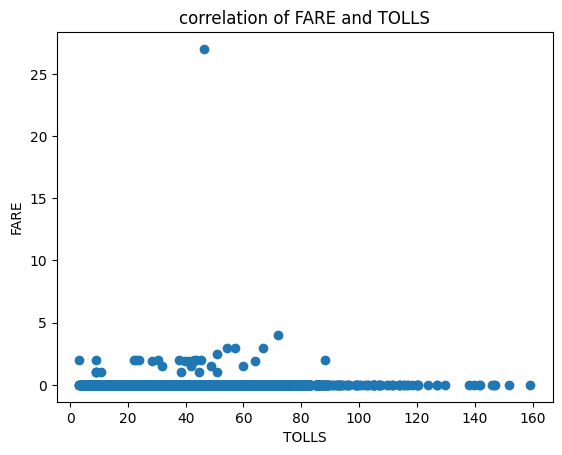

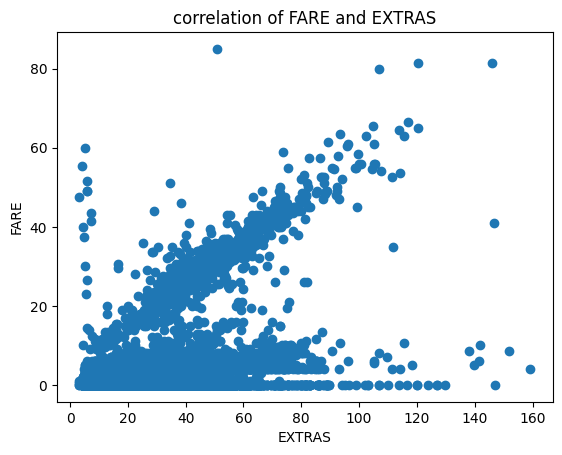

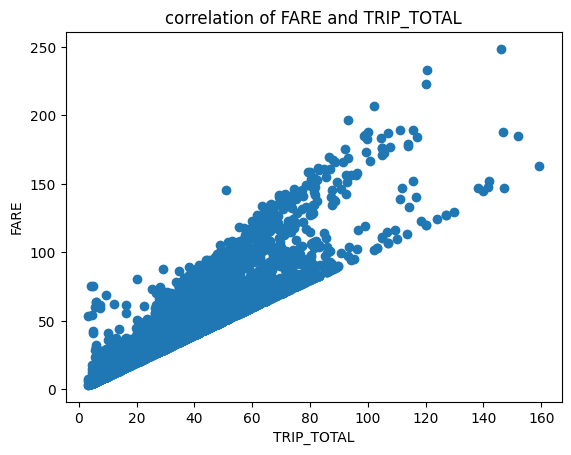

<Figure size 640x480 with 0 Axes>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

data_url = "https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv"
df = pd.read_csv(data_url)
print(df.columns)
print(">> df info:")
df.info()

print(">> sum of null values:")
print(df.isna().sum())
print(">> basic stats:")
print(df.describe())

sb.heatmap(df.corr(numeric_only=True))
plt.show()

for column in df.select_dtypes(include=['int64', 'float64']):
    plt.title(f"correlation of FARE and {column}")
    plt.xlabel(column)
    plt.ylabel('FARE')
    plt.scatter(df['FARE'], df[column])
    plt.show()
    plt.figure()

### 2.Prepare the Data 🔧  
   - Select the most relevant features for training.  
   - Handle missing values if needed.  
   - Normalize or scale the data to improve performance if needed
   - Split the dataset into **training (80%)** and **testing (20%)** sets.  

>🙋 **Why we need to split our dataset**❓

we split our dataset so that when the model is done learning we have some data that he's not yet exposed to, so that we can test it with it and see it's accuracy.

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#feature selection
relevant_features = ['TRIP_MILES', 'TRIP_SECONDS', 'TRIP_SPEED', 'FARE']
df = df[relevant_features]

scaled_df = StandardScaler().fit_transform(df)
df = pd.DataFrame(scaled_df, columns=df.columns)

X = df.drop(columns='FARE')
Y = df['FARE']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1337)

print("df:")
print(df.head())
print("X_train:")
print(X_train.head())
print("X_test:")
print(X_test.head())
print("Y_train:")
print(Y_train.head())
print("Y_test:")
print(Y_test.head())


df:
   TRIP_MILES  TRIP_SECONDS  TRIP_SPEED      FARE
0   -0.787202      1.099347   -1.463207  0.476424
1   -0.978516     -0.264605   -1.463207 -0.834143
2   -0.963376     -0.158029   -1.463207 -0.804679
3   -0.631674      2.196322   -1.463207 -0.009146
4   -0.982645     -0.296901   -1.463207 -0.819411
X_train:
       TRIP_MILES  TRIP_SECONDS  TRIP_SPEED
29184    1.306237      0.377002    1.624042
27292    1.336517      0.655820    1.201008
30663    2.547711      0.904497    2.200089
25682    1.308989      0.839906    0.921985
6519    -0.975763     -0.968650   -0.896161
X_test:
       TRIP_MILES  TRIP_SECONDS  TRIP_SPEED
17277    1.314495      2.183404   -0.095097
19201    1.267699      1.724806    0.120921
24070    0.944255      0.673045    0.696967
6173    -0.485780      0.404991   -0.914163
26152    1.377807      0.839906    1.002992
Y_train:
29184    1.198885
27292    1.228350
30663    2.392185
25682    1.257814
6519    -1.010929
Name: FARE, dtype: float64
Y_test:
17277    1.331474

### 3. Train the Model 🎯  

Train a **linear regression model** using `sklearn` (you can also try other alternatives).  

🔧 **Experiment with Different Features**  
- Start with a few features and observe the model's performance.  
- Try adding or removing features to see how it affects accuracy.  

> 🙋 **What are hyperparameters, and how do learning rate and epochs affect training** ❓

> Hyperparameters are settings or configurations that you choose before training a machine learning model. They control how the model learns from the data and are not learned from the data itself.

> 🙋 **Does using more features always improve the model** ❓

> More features do not always improve the model, adding irrelevant or redundant features can lead to overfitting, increased computational cost, and poor performance

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

model = LinearRegression()
model.fit(X_train, Y_train)
'''
y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
print("Mean squared Error:", mse)
print("Coeff:", model.coef_)
print("Intercept:", model.intercept_)
new_input = pd.DataFrame(np.array([[-0.975763,-0.968650,-0.896161]]), columns=X_train.columns)
predicted_price = model.predict(new_input)
print("predicted:", predicted_price)
'''

#### 🎉 Congratulations! 🎉

**🚀You’ve just trained your first Machine Learning model! 🚀**

### 4. Make Predictions 🔮  

Use the trained model to predict values on the **testing data**.  
Compare the predictions with the actual values to assess accuracy.  
You can also try making predictions on the **training data** to see how well the model memorized the patterns.  

>🙋 **Why doesn’t the model predict exact values, even when using the training data**❓

In [19]:
Y_pred = model.predict(X_test)
print("test:")
print(Y_test)
print("pred:")
print(Y_pred)
print()

Y_pred = model.predict(X_train)
print("train:")
print(Y_train)
print("pred:")
print(pd.DataFrame(Y_pred))
mse = mean_squared_error(Y_train, Y_pred)
print("mse:", mse)
print()

new_input = pd.DataFrame(np.array([[-0.978516, -0.264605, -1.463207]]), columns=X_train.columns)
predicted_price = model.predict(new_input)
print("value:", -0.834143)
print("predicted:", predicted_price)
#-0.978516, -0.264605, -1.463207 -0.834143

test:
17277    1.331474
19201    1.213617
24070    0.918976
6173    -0.439323
26152    1.302010
           ...   
25681    1.169421
4931    -1.217178
21642    0.521209
22491    0.462281
21106    0.874779
Name: FARE, Length: 6339, dtype: float64
pred:
[1.43575733 1.32718611 0.90597318 ... 0.52577414 0.48212315 0.93397702]

train:
29184    1.198885
27292    1.228350
30663    2.392185
25682    1.257814
6519    -1.010929
           ...   
19623    1.281385
9448     0.329692
860     -0.996197
24765    2.148811
3223    -0.996197
Name: FARE, Length: 25355, dtype: float64
pred:
              0
0      1.182677
1      1.239462
2      2.300445
3      1.238448
4     -0.989997
...         ...
25350  1.427288
25351  0.311498
25352 -1.007183
25353  0.033868
25354 -0.981974

[25355 rows x 1 columns]
mse: 0.04021787819406701

value: -0.834143
predicted: [-0.89241881]


### 5.Evaluate the Model 📊

Measure performance using metrics like MSE, RMSE, and R² Score.
Plot a loss curve to track training progress.
Create a scatter plot to compare actual vs. predicted values.

>🙋 **What do MSE, RMSE, and R² Score tell us about the model's performance**❓

>🙋 **How can you tell if your model is overfitting or underfitting**❓


In [16]:
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

pred = model.predict(X_test)

mse = mean_squared_error(Y_test, pred)
print("mse:", mse)

rmse = root_mean_squared_error(Y_test, pred)
print("rmse:", rmse)

r2s = r2_score(Y_test, pred)
print("r2s:", r2s)


mse: 0.047670588618199936
rmse: 0.21833595356285215
r2s: 0.9521481780753974


---
## Exercise 02 : **University Admission Prediction Challenge**

😇 I know that the exercise is difficult, but you will practice what you learned last week along with your first classification algorithm.

### 🎯 Objective

Your mission is to predict whether a student will be admitted to their desired university based on various academic and application-related factors. You’ll use **Logistic Regression** to build a predictive model and discuss its strengths and limitations.

📊 The Dataset  :

[Admission_Predict.csv](https://github.com/1337-Artificial-Intelligence/Entry-Level-ML-Engineer-Bootcamp/blob/main/Week02/Admission_Prediction_Challenge.csv)

The dataset contains information on **400 students** with the following attributes:

- **GRE Score** 🎓
- **TOEFL Score** 📚
- **University Rating** 🏛️
- **Statement of Purpose (SOP) Score** ✍️
- **Letter of Recommendation (LOR) Score** 📩
- **Cumulative Grade Point Average (CGPA)** 🎯
- **Research Experience (Yes/No)** 🔬
- **Chance of Admission (Target Variable: 0 or 1)**

### 🛠️ Steps to Follow

1. **Load & Explore the Data**: Understand the dataset, check for missing values, and analyze distributions.
2. **Feature Selection & Processing**: Identify relevant features and scale them if needed.
3. **Train a Logistic Regression Model**: Implement Logistic Regression (**from scratch** optional) to classify students into "Admitted" or "Not Admitted."
4. **Evaluate the Model**: Measure accuracy, precision, recall, and other key metrics.(do some reaserch 🙂)
5. **Discuss Limitations**: Explore cases where Logistic Regression may struggle and suggest improvements (e.g., feature engineering, alternative models).

### **Resources**  
[Logistic Regression](https://mlu-explain.github.io/logistic-regression/)

### 🎨 Bonus: Visual Exploration

Use **histograms, correlation heatmaps, and scatter plots** to gain insights before modeling.

🔎 **Can you build a model that accurately predicts student admissions?** Let's find out! 🚀

In [ ]:
# add your code here

---
##🎉 **Congratulations!** 🎉  

You've successfully trained your first **Linear Regression** and **Logistic Regression** models! 🚀  

Through this journey, you've learned:  
✅ How to **prepare and preprocess data** for training.  
✅ The importance of **choosing the right features** and tuning **hyperparameters**.  
✅ How to **train, predict, and evaluate models** using key metrics.  
✅ The difference between **regression (predicting continuous values)** and **classification (predicting categories)**.  

This is a **big step** in your Machine Learning journey! 💡 But ML is much more than just linear and logistic regression—there are many other models and techniques to explore.  

🔎 **Next Challenge:**  
- Research other **types of ML models** (e.g., Decision Trees, SVMs, Neural Networks).  
- Try solving different **real-world problems** using what you've learned.  

👏 Keep experimenting, keep learning, and welcome to the world of Machine Learning! 🚀🔥